#### 그림, 실습코드 등 학습자료 출처 : https://datascienceschool.net

#### 1. Trend(결정론적 추세)

<img src="1.jpg" width="1000" />

아래 예시들은 모두 추세를 가지는 확률과정을 시뮬레이션 한 것이다.

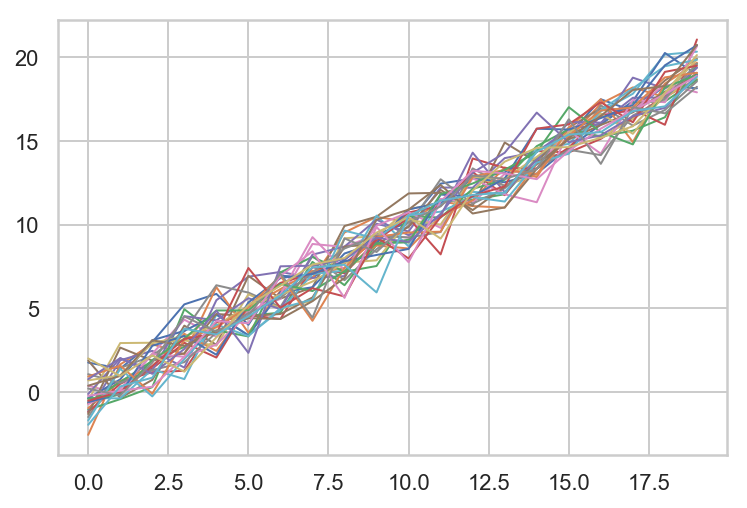

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.random.seed(0)
t = np.arange(20)
y = np.zeros((30, 20))
for i in range(30):
    y[i, :] = t + sp.stats.norm.rvs(size=20)
    plt.plot(t, y[i], lw=1)
plt.show()

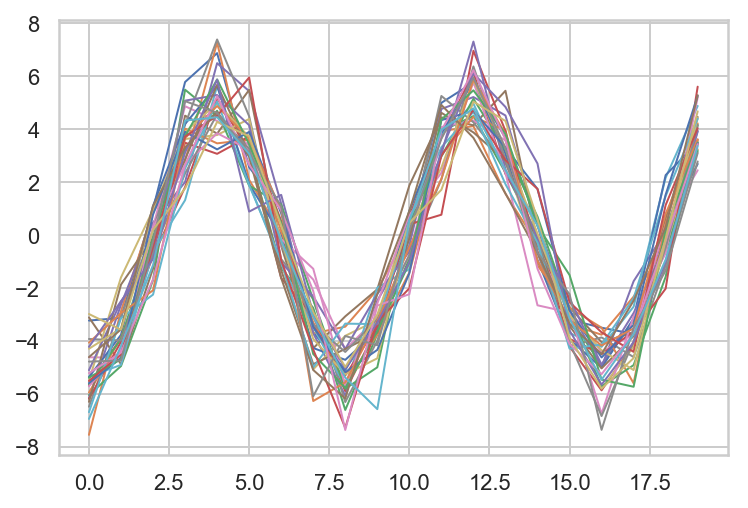

In [4]:
np.random.seed(0)
t = np.arange(20)
y = np.zeros((30, 20))
for i in range(30):
    y[i, :] = -5 * np.cos(0.25 * np.pi * t) + sp.stats.norm.rvs(size=20)
    plt.plot(t, y[i], lw=1)
plt.show()

#### 2. trend estimation(추세추정)

<img src="2.jpg" width="1000" />

#### 3. 다항식 추세

<img src="3.jpg" width="1000" />

대기중 CO2 농도를 측정 예시

In [5]:
data = sm.datasets.get_rdataset("CO2", package="datasets")
df = data.data

def yearfraction2datetime(yearfraction, startyear=0):
    import datetime
    import dateutil
    year = int(yearfraction) + startyear
    month = int(round(12 * (yearfraction - year)))
    delta = dateutil.relativedelta.relativedelta(months=month)
    date = datetime.datetime(year, 1, 1) + delta
    return date

df["datetime"] = df.time.map(yearfraction2datetime)
df["month"] = df.datetime.dt.month
df.tail()

,time,value,datetime,month
463,1997.583333,362.57,1997-08-01,8
464,1997.666667,360.24,1997-09-01,9
465,1997.750000,360.83,1997-10-01,10
466,1997.833333,362.49,1997-11-01,11
467,1997.916667,364.34,1997-12-01,12


In [7]:
result = sm.OLS.from_formula("value ~ time", data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 1.479e+04
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        12:27:37   Log-Likelihood:                -1113.5
No. Observations:                 468   AIC:                             2231.
Df Residuals:                     466   BIC:                             2239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2249.7742     21.268   -105.784      0.000   -2291.566   -2207.982
time           1.3075      0.011    121.634      0.000       1.286       1.329
==============================================================================
Omnibus:                       15.857   Durbin-Watson:                   0.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.798
Skew:                           0.048   Prob(JB):                       0.0203
Kurtosis:                       2.375   Cond. No.                     3.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

result.summary에 따르면 추세함수는 아래와 같다.

f(t) = 1.3075t - 2249.7742

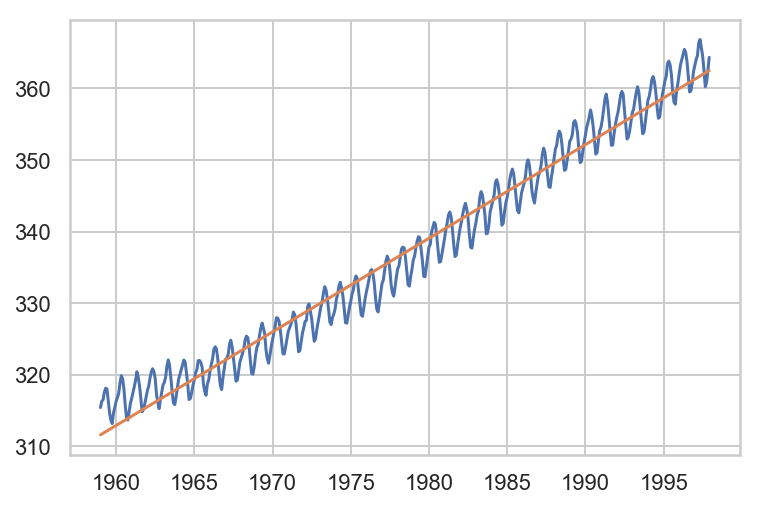

In [8]:
t = df.time
y = df.value
trend = result.params[0] + result.params[1] * t
plt.plot(t, y, '-', t, trend, '-')
plt.show()

만약 추세가 2차 함수 형태라면 아래와 같이 추세를 추정할 수 있다.

In [10]:
result2 = sm.OLS.from_formula("value ~ time + I(time ** 2)", data=df).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.075e+04
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        12:29:41   Log-Likelihood:                -1027.8
No. Observations:                 468   AIC:                             2062.
Df Residuals:                     465   BIC:                             2074.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      4.77e+04   3482.902     13.696      0.000    4.09e+04    5.45e+04
time           -49.1907      3.521    -13.971      0.000     -56.110     -42.272
I(time ** 2)     0.0128      0.001     14.342      0.000       0.011       0.015
==============================================================================
Omnibus:                       66.659   Durbin-Watson:                   0.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.850
Skew:                          -0.116   Prob(JB):                     0.000133
Kurtosis:                       2.072   Cond. No.                     1.35e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

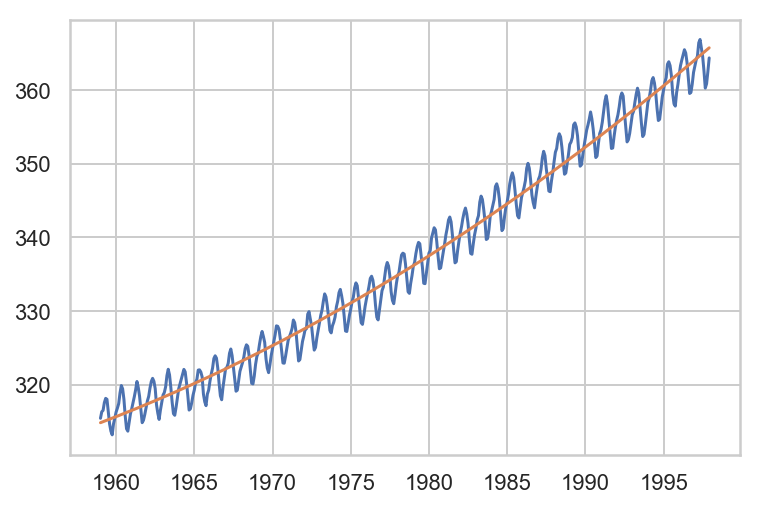

In [11]:
trend2 = result2.params[0] + result2.params[1] * t + result2.params[2] * t**2
plt.plot(t, y, '-', t, trend2, '-')
plt.show()

#### 3. 계절성 추세

<img src="4.jpg" width="1000" />

In [14]:
df2 = sm.datasets.get_rdataset("deaths", "MASS").data
df2["datetime"] = df2.time.map(yearfraction2datetime)
df2["month"] = df2.datetime.dt.month
df2.tail()

,time,value,datetime,month
67,1979.583333,1354,1979-08-01,8
68,1979.666667,1333,1979-09-01,9
69,1979.750000,1492,1979-10-01,10
70,1979.833333,1781,1979-11-01,11
71,1979.916667,1915,1979-12-01,12


In [16]:
result = sm.OLS.from_formula('value ~ C(month) - 1', data=df2).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     31.66
Date:                Tue, 28 May 2019   Prob (F-statistic):           6.55e-21
Time:                        12:41:12   Log-Likelihood:                -494.38
No. Observations:                  72   AIC:                             1013.
Df Residuals:                      60   BIC:                             1040.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]   2959.3333    103.831     28.502      0.000    2751.641    3167.025
C(month)[2]   2894.6667    103.831     27.879      0.000    2686.975    3102.359
C(month)[3]   2743.0000    103.831     26.418      0.000    2535.308    2950.692
C(month)[4]   2269.6667    103.831     21.859      0.000    2061.975    2477.359
C(month)[5]   1805.1667    103.831     17.386      0.000    1597.475    2012.859
C(month)[6]   1608.6667    103.831     15.493      0.000    1400.975    1816.359
C(month)[7]   1550.8333    103.831     14.936      0.000    1343.141    1758.525
C(month)[8]   1408.3333    103.831     13.564      0.000    1200.641    1616.025
C(month)[9]   1397.3333    103.831     13.458      0.000    1189.641    1605.025
C(month)[10]  1690.0000    103.831     16.277      0.000    1482.308    1897.692
C(month)[11]  1874.0000    103.831     18.049      0.000    1666.308    2081.692
C(month)[12]  2478.5000    103.831     23.871      0.000    2270.808    2686.192
==============================================================================
Omnibus:                       19.630   Durbin-Watson:                   1.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.630
Skew:                           0.787   Prob(JB):                     1.67e-11
Kurtosis:                       6.750   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

모형식 문자열에서 -1은 y절편을 모형에 넣지 않는 것을 의미한다. 

다시말해서 모든 month변수의 가능한 값을 사용한다. 

month 변수가 0과 1값을 가지는 dummy 변수이기때문에 이 분석에서 구한 계수는 특정한 달의 기온 평균값이 된다.

추정한 계절성 성분과 나머지 성분을 분리하여 그리면 아래와 같다.

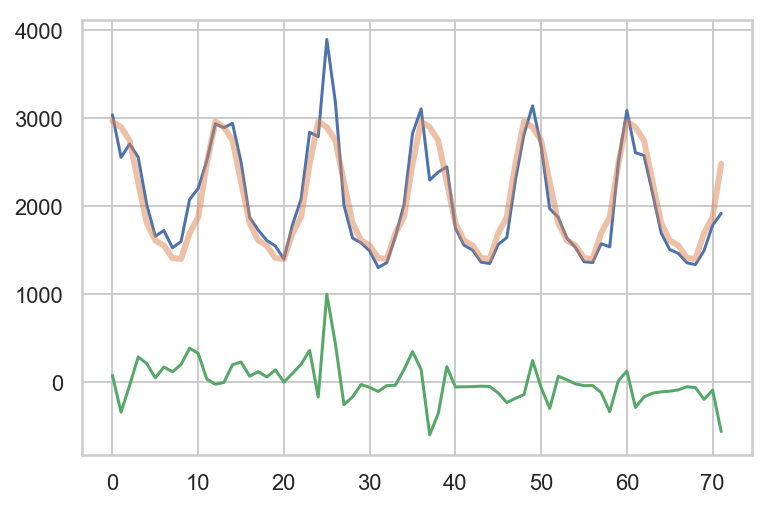

In [20]:
plt.plot(df2.value) # 파란색 선
plt.plot(result.fittedvalues, lw=3, alpha=0.5) # 살색 선
plt.plot(result.resid) # 초록색 선
plt.show()

위 방법으로 찾아낸 잔차 시계열을 보면 시간이 지나갈 수록 점점 감소하고 있는 것을 확인할 수 있다.

이러한 선형추세까지 한꺼번에 잡아내려면 다음과 같이 회귀분석을 하면 된다.

In [22]:
result2 = sm.OLS.from_formula('value ~ time + C(month) - 1', data=df2).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     36.43
Date:                Tue, 28 May 2019   Prob (F-statistic):           8.56e-23
Time:                        12:49:03   Log-Likelihood:                -486.75
No. Observations:                  72   AIC:                             999.5
Df Residuals:                      59   BIC:                             1029.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]   1.204e+05   3.15e+04      3.825      0.000    5.74e+04    1.83e+05
C(month)[2]   1.203e+05   3.15e+04      3.823      0.000    5.73e+04    1.83e+05
C(month)[3]   1.202e+05   3.15e+04      3.819      0.000    5.72e+04    1.83e+05
C(month)[4]   1.197e+05   3.15e+04      3.803      0.000    5.67e+04    1.83e+05
C(month)[5]   1.192e+05   3.15e+04      3.789      0.000    5.63e+04    1.82e+05
C(month)[6]    1.19e+05   3.15e+04      3.782      0.000    5.61e+04    1.82e+05
C(month)[7]    1.19e+05   3.15e+04      3.781      0.000     5.6e+04    1.82e+05
C(month)[8]   1.189e+05   3.15e+04      3.776      0.000    5.59e+04    1.82e+05
C(month)[9]   1.188e+05   3.15e+04      3.776      0.000    5.59e+04    1.82e+05
C(month)[10]  1.191e+05   3.15e+04      3.785      0.000    5.62e+04    1.82e+05
C(month)[11]  1.193e+05   3.15e+04      3.791      0.000    5.63e+04    1.82e+05
C(month)[12]  1.199e+05   3.15e+04      3.810      0.000     5.7e+04    1.83e+05
time           -59.4024     15.920     -3.731      0.000     -91.258     -27.547
==============================================================================
Omnibus:                       26.709   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.584
Skew:                           0.943   Prob(JB):                     5.30e-23
Kurtosis:                       8.535   Cond. No.                     7.93e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

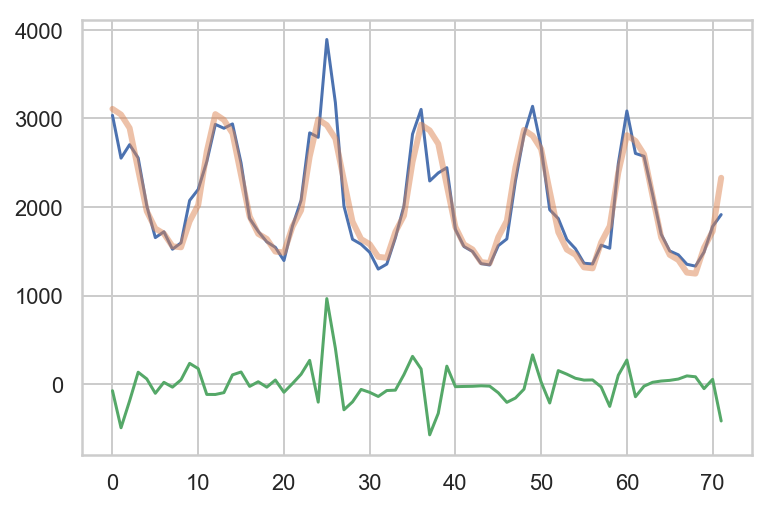

In [23]:
plt.plot(df2.value)
plt.plot(result2.fittedvalues, lw=3, alpha=0.5)
plt.plot(result2.resid)
plt.show()

이제는 CO2를 계절성까지 포함하여 추세 추정을 하는 실습을 해보자.

In [24]:
result3 = sm.OLS.from_formula("value ~ 0 + C(month) + time + I(time ** 2)", data=df).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.531e+04
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        12:50:35   Log-Likelihood:                -505.82
No. Observations:                 468   AIC:                             1040.
Df Residuals:                     454   BIC:                             1098.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]   4.771e+04   1155.536     41.289      0.000    4.54e+04       5e+04
C(month)[2]   4.771e+04   1155.536     41.290      0.000    4.54e+04       5e+04
C(month)[3]   4.771e+04   1155.536     41.290      0.000    4.54e+04       5e+04
C(month)[4]   4.771e+04   1155.536     41.291      0.000    4.54e+04       5e+04
C(month)[5]   4.771e+04   1155.536     41.292      0.000    4.54e+04       5e+04
C(month)[6]   4.771e+04   1155.536     41.291      0.000    4.54e+04       5e+04
C(month)[7]   4.771e+04   1155.536     41.290      0.000    4.54e+04       5e+04
C(month)[8]   4.771e+04   1155.536     41.288      0.000    4.54e+04       5e+04
C(month)[9]   4.771e+04   1155.536     41.287      0.000    4.54e+04       5e+04
C(month)[10]  4.771e+04   1155.536     41.286      0.000    4.54e+04       5e+04
C(month)[11]  4.771e+04   1155.536     41.287      0.000    4.54e+04       5e+04
C(month)[12]  4.771e+04   1155.536     41.288      0.000    4.54e+04       5e+04
time           -49.2021      1.168    -42.120      0.000     -51.498     -46.907
I(time ** 2)     0.0128      0.000     43.242      0.000       0.012       0.013
==============================================================================
Omnibus:                        8.182   Durbin-Watson:                   0.169
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.581
Skew:                           0.260   Prob(JB):                       0.0226
Kurtosis:                       2.654   Cond. No.                     4.68e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

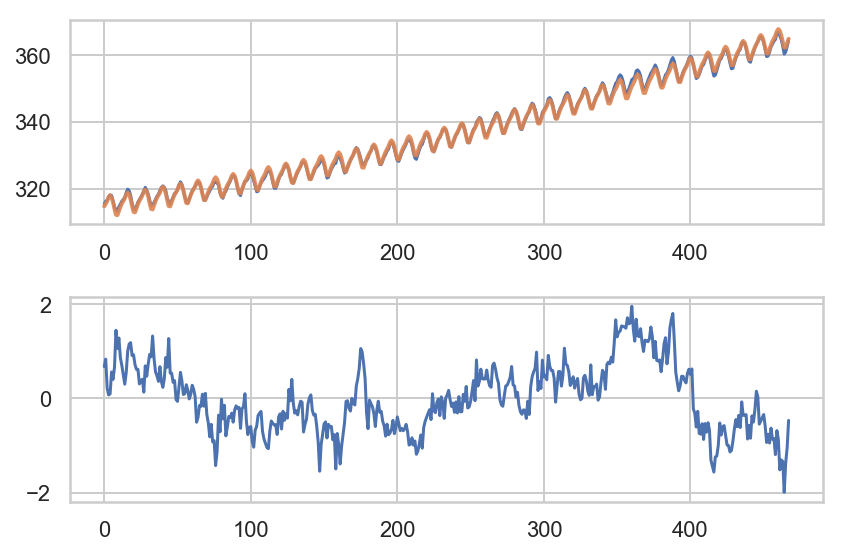

In [30]:
plt.subplot(211)
plt.plot(df.value)
plt.plot(result3.fittedvalues, lw=2, alpha=0.9)
plt.subplot(212)
plt.plot(df.value - result3.fittedvalues) # result3.resid 와 같다.
plt.tight_layout()
plt.show()